# Aceleradores de Gradiente (Parte 2)
## Adadelta
El Adadelta (Adaptive Delta) fue introducido por Matthew D. Zeiler (2010) (referencia en las notas de clase). Es una variante del AdaGrad, pero en vez de sumar toda la historia desde el principio se suma la historia en una ventanda. Es decir, el caulculo de $G^{(i)}$ cambia asi

$$G^{(i)} = \sum_{  \max \{{j-w, 1} \}}^{\min{ \{ j+w, i \}}} g^{(j)} \circ g^{(j)} $$
donde $w$ es una ancho de ventana.
Si $w=0$ estamos en el metodo de AdaGrad. Si $w>0$ tenemos una historia pero mas localizada.

Otra variante del AdaDelta es el RMSprop el cual en vez de una ventana (running window) que se mueve, es un promedio expencial. La idea usada en Momentum.

## RMSprop
No hay articulo de este metodo. Lo introdujo Geffrey Hinton (de la Universidad de Toronto. Premio Nobel de fisica).
Toma ideas de los anteriores en la siguiente forma

$$v^{(i)} = \beta v^{(i-1)} + (1 - \beta) g^{(i)} \circ g^{(i)} $$

$$\theta^{(i)} = \theta^{(i-1)} - \frac{\eta}{\sqrt{v^{(i)} + \epsilon}} \circ g^{(i)} $$
Puede comenzar en $v^{(0)}=0$

El ultimo que veremos es el Adam (Adaptive momenta)
## Adam

Este introduce ideas de los anteriores pero incluye un segundo momentum ( lo explico enseguida).  Introducido por
Kingma and Ba en 2017 (referencia en las notas de clase).

Las ecuaciones que definen al Adam son

$$s^{(i)} = \beta_1 s^{(i-1)} + (1 - \beta_1) g^{(i)} $$
$$t^{(i)} = \beta_2 s^{(i-1)} + (1 - \beta_2) g^{(i)} \circ g^{(i)} $$

$$\theta^{(i)} = \theta^{(i-1)} - \frac{\eta s^{(i)}}{\sqrt{t^{(i)} + \epsilon}} $$

Los autores del Adam sugieren $\beta_1 = 0.9$, $\beta_2 = 0.999$.

Con esto vamos a hacer una iteracion (a mano) comenzando con $s^{(o)} = t^{(o)} = 0 $

\begin{eqnarray}
 s^{(1)} &=& 0.1 g^{(1)}  \\
t^{(1)} &=& 0.001 g^{(1)} \circ g^{(1)}  \\
\theta^{(1)} &=& \theta^{(0)} - \frac{\eta s^{(1)}}{t^{(1)} + \epsilon}
\end{eqnarray}

Podria pasar que, por ejemplo $t^{(1)} \approx 0$. Los autores introdujeron una normalizacion

$$s^{(i)} = \beta_1 s^{(i-1)} + (1 - \beta_1) g^{(i)} $$
$$t^{(i)} = \beta_2 s^{(i-1)} + (1 - \beta_2) g^{(i)} \circ g^{(i)} $$


$$s^{(i)} \leftarrow \frac{s^{(i)}}{1 - \beta_1^2} $$
$$t^{(i)} \leftarrow \frac{t^{(i)}}{1 - \beta_2^2} $$



$$\theta^{(i)} = \theta^{(i-1)} - \frac{\eta s^{(i)}}{\sqrt{t^{(i)} + \epsilon}} $$


Con el ejemplo numerico que disenhamos arriba re-calculemos $s^{(1)}$ como $t^{(1)}$.

$$s^{(1)} =  \frac{0.1 g^{(1)}}{0.19}  \approx 0.526 g^{(1)} $$
$$t^{(1)} =  \frac{0.001 g^{(1)} \circ g^{(1)}}{0.001999}  \approx 0.5 g^{(1)} \circ g^{(1)} $$

In [ ]:
beta2=0.999
1 - beta2**2

0.001998999999999973

# Demos:
En esta seccion vamos a ver algunas demostraciones en Internet con los enlaces respectivos.

* [Wikipedia](https://en.wikipedia.org/wiki/Test_functions_for_optimization) ilustra algunas funciones para propar metodos de descenso.

* [Rosenbrock](https://en.wikipedia.org/wiki/Rosenbrock_function) es una funcion no convexa introducida por Howard H. Rosenblock en 1960. El reto es un valle de forma de banano.  

* [Why momentum really works](https://distill.pub/2017/momentum/) es una aplicacion interactiva para probar los parametros de "momentum" ($\beta, \alpha$) para nosotros en este momento $\alpha$ es $\eta$.

* Otra funcion retadora es la superficie de Beale.
La ecuacion

$$f(x,y) = (1.5 - x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 - x + x y^3)^2 $$



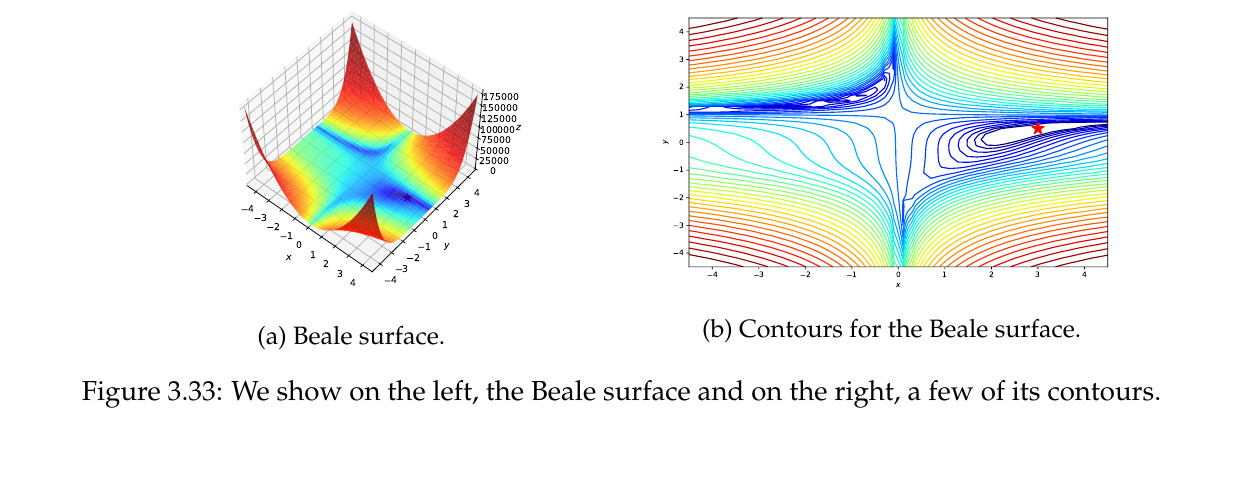

* [optimizers numpy](https://github.com/ilguyi/optimizers.numpy?tab=readme-ov-file) incluye codigo en `Python`  para
ilustrar los aceleradores de gradiente en la funcion Beale y otra convexa (son como elipeses concentricas).

* [animacion sobre una funcion convexa](https://user-images.githubusercontent.com/11681225/50016682-39742a80-000d-11e9-81da-ab0406610b9c.gif)  muestra
como avanzan los gradientes con los distintos aceleradores.

* [animacion en la Beale surface](https://user-images.githubusercontent.com/11681225/49325458-fc785480-f585-11e8-8d2a-9012d6024c6e.gif)
es como el item anterior pero sobre el Beale surface. Observe las distintas velocidades de convergencia en los aceleradores que hemos discutido en esta clase.

* [LiliJiang's Github site}(https://github.com/lilipads/gradient_descent_viz). Es una pagina muy ilustrativa de como funcionan los distinos aceleradores.

* [Virtual Library of Simulation Experiments](https://www.sfu.ca/~ssurjano/optimization.html). Ofrece 47 funciones reto para probar optimizacion usando los metodos de gradiente.

* Una de las 47 funciones en la libreria del "item" anterior es el Ackley Function.

$$f(x) = -a \exp \left ( -b \sqrt{\frac1n \sum_{i=1}^n x_i^2 }  \right )  - \exp \left ( \frac1n \sum_{i=1}^n \cos(c x_i) \right )  + a + \exp(1) $$
donde $n$ es la dimension del dominio. Para $n=2$, $a=20, $b=0.2$ tenemos

$$f(x,y) = -20 \exp ( -0.2 \sqrt{0.5(x^2 + y^2)} - \exp(0.5(\cos 2 \pi x) + \cos(2 \pi y)) + \mathrm{e} + 20 . $$



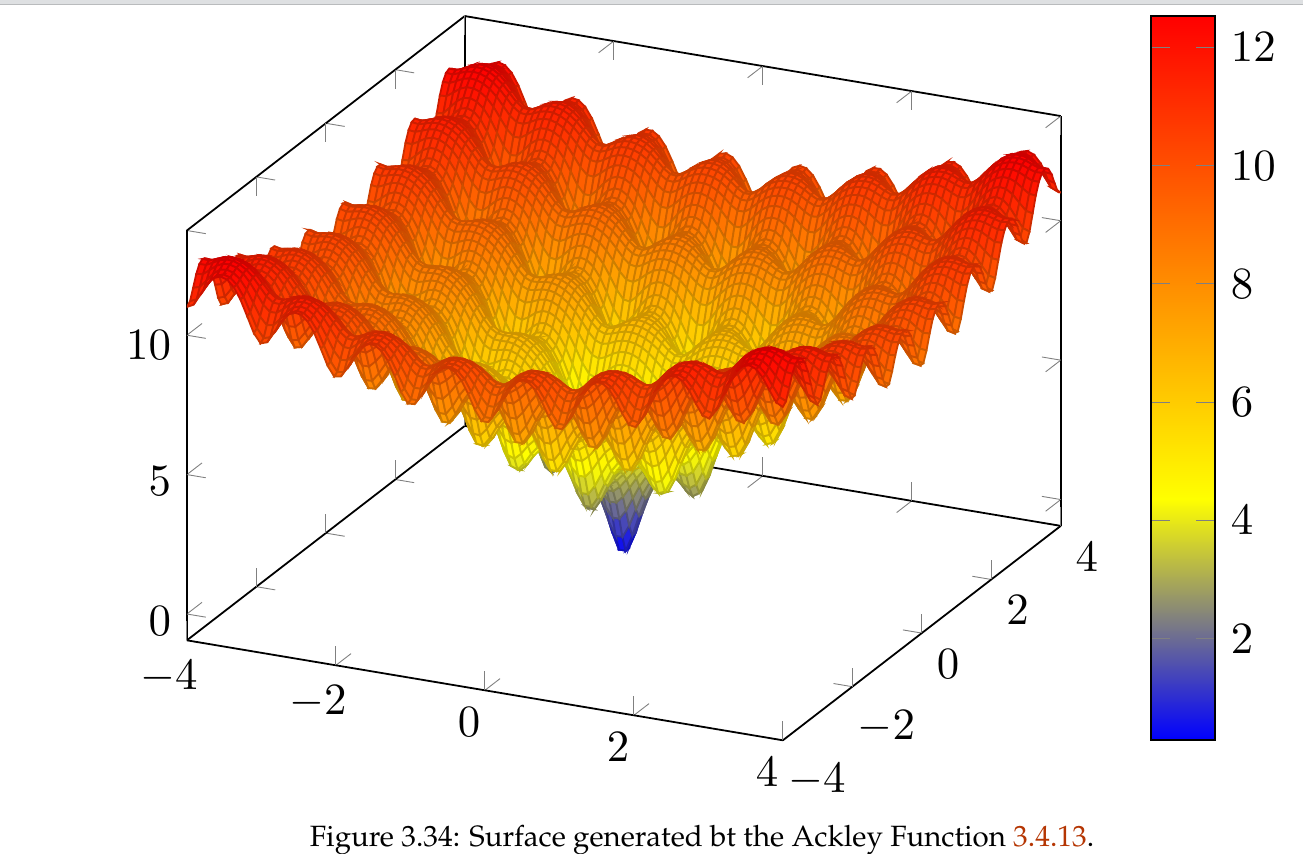

* La ultima superficie reto es la Rastrigin surface.

$$f(x) = A n + \sum_{i=1}^n [ x_i^2 - A \cos(2 \pi x_i)] \quad , \quad x = (x_1, x_2, \cdots, x_n) $$
Por ejemplo para $n=2$ (2D)


$$f(x,y) = 20 + x^2 - 10 \cos(2 \pi x) + y^2 - 10 \cos (2 \pi y) $$

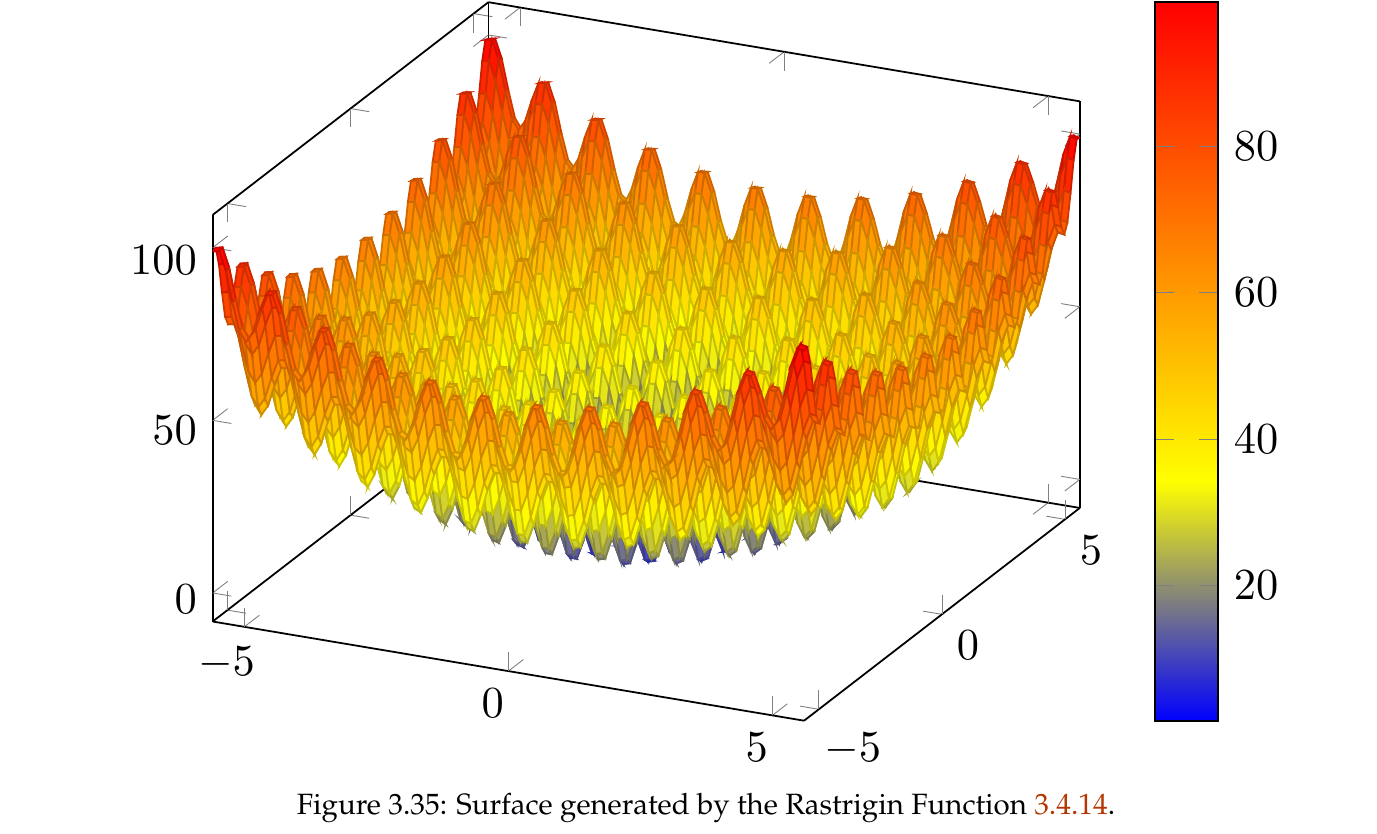

# Siguientes temas de clase:
* Funciones de costo
* Redes Neuronales:
    * Introduccion
    * Backpropagation (propagacion hacia atras) mas general que la del curso de ML (semestre anterior).

### Funciones de costo
Existen funciones de error y de costo, pero no lo mismo. El error se usa para determinar la precision de un sistema, las funciones de costo para optimizar (buscar el minimo). Sin embargo muchas funciones de error se usan como funciones de costo.

Las hay continuas como por ejemplo regresion lineal. (minimos cuadrados) y discretas como las de regresion logistica. Clasificacion.  

Vamos a mirar varias funciones de costo importantes en ML
(recurden Ciencia de datos -> AI -> ML -> DL -> LLM)

* Mean Square Error (MSE)
* Cross-Entropy loss (binario)
* Categorical Cross-Entropy loss. (multiclase)

Vamos a usar la siguiente notacion:

$x_i \quad , \quad \text{dato}$

$y_i \quad , \quad \text{etiqueta}$

$\theta \quad , \quad \text{parametro, feature}$

$ h(\theta_j, x_i) \quad, \quad \text{hipotesis}$
### Mean Squared Error (error de la media cuadrada)

Qusieramos que la hipotesis $h(\theta, x_i)$ coincida con la etiqueta $y_i$. Pero casi siempre esto no es posible.

$$C(\theta) = \frac1m \sum_{i=1}^m ( h(\theta, x_i) - y_i)^2 + \frac{\lambda}{2n} \sum_{i=1}^n \theta_i^2. $$

 Notas:
 * Para regresion lineal $h(\theta, x_i) = \langle x_i, \theta \rangle = x_i^T \theta$

 * Para clasificacion binaria se prefiere la sigmoid ligistic

 $$\sigma(\theta) = h(\theta, x_i) = \frac{1}{1 + \exp(- x_i^T \theta)} \tag{1}$$


## Cross-Entropy loss     
Se usa basicamente para clasficacion binaria. Aunque se puede hacer multiclase con el metodo uno-contra-todos (uno-contra-el-rest).


$$C(\theta) = -\frac1m \sum_{i=1}^m y_i \log[ h(\theta, x^{(i)}] + (1 - y_i) \log (1 - h(\theta, x^{(i)})] + \frac{\lambda}{2 n} \sum_{j=1}^n \theta_j^2 $$

La funcion hipotesis $h$ seria la sigmoid.

## Categorical Cross-entropy loss.
Multiclase. En este caso se pueden usar one-hot vectors para describir varias clases. Por ejemplo

$$
\text{cat} = \begin{pmatrix} 1 \\ 0 \\ 0  \end{pmatrix}  \quad, \quad
\text{dog} = \begin{pmatrix} 0 \\ 1 \\ 0  \end{pmatrix}  \quad, \quad
\text{pig} = \begin{pmatrix} 0 \\ 0 \\ 0  \end{pmatrix}  \quad, \quad
$$
Si $K$ es el numero de clases
$$C(\theta) =-\frac1m \sum_{i=1}^m \sum_{k=1}^K y_i^{(k)} \log[h_k(\theta, x_i)] + (1 - y_i^{(k)}) \log [ 1 - h_k(\theta, x_i) + \frac{\lambda}{2n} \sum_{j=1}^n \theta_j^2 \tag{2}$$

La pregunta en este momento es quien es $h$?

Para multiclase vamos a definir una funcion de activacion llamada **softmax activation function**. Es la generalizacion a mas de clases de la sigmoid logistic.





Es como una probabilidad multivariada
\begin{eqnarray}
\sigma : \mathbb{R}^K &\to& [0,1]^K \\
(z_i) &\mapsto& \sigma(z_i) = \frac{\exp(z_i)}{\sum_{j=1}^K \exp(z_j)} \quad, \quad i=1,2, \cdots, K,  z_i \in \mathbb{R}
\end{eqnarray}

 Se puede verificar que esta funcion se comporta como una densidasd de probabilidad. Es positiva, es monotona creciente entre 0 y 1.

 Tambien se puede probar (ejercicios) que cuando $K=2$ esta funcion es exactamente la sigmoid logistic (1)


 Como definir $h$ en la ecuacion (2). Existen $K$ clases,
 $y=1, y=2, \cdots, y=K$

\begin{eqnarray}
h(\theta, x) =
\begin{pmatrix}
P(y=1 | x; \theta) \\
P(y=2 | x; \theta) \\
\vdots \\
P(y=K | x; \theta)
\end{pmatrix}
=
\begin{pmatrix}
\sigma(z_1) \\
\sigma(z_2) \\
\vdots \\
\sigma(z_K) \\
\end{pmatrix}
=
\frac{1}{\sum_{j=1}^K \exp( {\theta^{(j)}}^T x)}
\begin{pmatrix}
\exp( {\theta^{(1)}}^T x) \\
\exp( {\theta^{(2)}}^T x) \\
\vdots \\
\exp( {\theta^{(K)}}^T x) \\
\end{pmatrix}
\end{eqnarray}


En ML usamos la siguiente tecnica para hallar la logistic regression  cost function.

* Escrimos la probabilidad multidimensional para cada muestra.
* Escribinmos el likelihood (verosimilitud) function que debe ser maximizada sobre el doble producto de muestras y clases
* Tomamos el logaritmo de la anterior. Por que es mas facil trabajar con sumas que con multiplicaciones.
* Cambiamos el signo para convertir la funcion de concava a convexa. (Hallar el minimo)

Haciendo lo mismo con este proceso se llega a la **categorical cross-entropy**.

$$C(\theta^{(k)}) = - \left [ \sum_{i=1}^m \sum_{k=1}^K  \mathcal{1} \{ y=k \} \log \frac{\exp \left (  {\theta^{(k)}}^T x^{(i)} \right )}{\sum_{j=1}^K
\exp\left ( {\theta^{(j)}}^T x^{(j)}   \right )}     \right ] $$


Donde la funcion indicadora esta definida


$$
I(x) =
\begin{cases}
1  \quad \text{si  } x \quad \text{es verdad} \\
0  \quad \text{si  } x \quad \text{es falso} \\
\end{cases}
$$


La pregunta ahora es cual es el gradiente de $C(\theta^{(k)})$

$$\nabla C(\theta^{(k)}) = - \sum_{i=1}^m
\left [  x^{(i)} \left (  \mathcal{1} \{ y^{(i)} = k  \} - P(y^{(i)} = k| x^{(i)}, \theta^{(k)}  \right )   \right ]  $$

donde

$$P(y^{(i)} = k | x^{(i)}; \theta^{(k)}) =  \log \frac{\exp(z_k)}{\sum_{j=1}^K \exp(z_{ik})} $$

Podria pasar que las clases esten mixtas. Por ejemplo "perros y gatos", o "perros y cerdos".  Se pueden usar vectores de la forma

$$ \text{perros y gatos} = \begin{pmatrix} 1 \\ 1 \\ 0 \end{pmatrix}  $$
$$ \text{gatos y cerdos} = \begin{pmatrix} 0 \\ 1 \\ 1 \end{pmatrix}  $$
etc.
No hay tanta separabilidad y no es tan claro como definir la hipotesis.

En general la medida de no similaridad (dissimilarity) entre dos probabilidades $p$, $q$ se llama **cross-entropy**. La formula de cross-entropy

$$H(p, q) = - \sum_x p(x) \log q(x) $$

Es interesante ver que el minimo de esta funcion se da cuando $p=q$.
En este sentido esta cross-entropia mide la similaridad entre dos distribuciones. Un forma de ver esto es usando el concepto de
**Leibler (KL) divergence**.

$$D_{KL}( p \parallel q) = \sum_x p(x) \log \frac{p(x)}{q(x)} $$

Una forma de encontrar el minimo de $H(p,q)$ es hallando el minimo de $D_{KL}$
pues $H(p,q)$ se puede expresar como

$$ H(p,q) = H(p) + D_{KO}( p \parallel q) $$
Dado que $D_{KL}(p \parallel q) \ge 0$, El minimo se adquiere cuado $p=q$ que es cuando $D_{KL}=0$.

En general, **categorical cross entropy** se puede definir como

$$L = - \sum_{i=1}^k y_i \log \hat{y}_i $$
donde $y_i$ es la etiqueta y $\hat{y}_i$ la  probabilidad de la clase.

# Proxima clase:

* Redes neuronales:
    * introduccion
    * backpropagation

* DL: Deep Learning:
    * redes convolucionales CNN
    * y demas.